In [95]:
!pip install pymongo
!pip install json_normalize
!pip install pyecharts 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
from pandas import json_normalize
import re
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('bmh')

%matplotlib inline

In [97]:
conn = MongoClient('mongodb://127.0.0.1:27017')
db = conn['Lianjia']
zufang = db['zufang_']
mon_data = zufang.find()

data = json_normalize([com for com in mon_data])
data.head()

,_id,title,address,area,city,direction,dist,floor_info,price,rem_word,room_type
0,6748623e7fbef5acefeee40b,整租·广渠家园 2室1厅 西北,东城 广渠门 广渠家园,61.23㎡,北京,None,东城,高楼层 （29层）,5600 元/月,官方核验 精装 集中供暖 随时看房,2室1厅1卫
1,6748623e7fbef5acefeee40c,整租·民旺园 2室1厅 东/西/北,东城 和平里 民旺园,65.35㎡,北京,None,亦庄开发区,低楼层 （18层）,7500 元/月,新上 近地铁 集中供暖 押一付一 随时看房 首次出租,2室1厅1卫
2,6748623e7fbef5acefeee40d,整租·交道口东大街 2室1厅 南/北,东城 交道口 交道口东大街,68.83㎡,北京,None,东城,高楼层 （29层）,11000 元/月,官方核验 近地铁 集中供暖 随时看房,2室1厅1卫
3,6748623e7fbef5acefeee40e,整租·东四块玉南街30号院 2室1厅 南/北,东城 左安门 东四块玉南街30号院,57.00㎡,北京,None,亦庄开发区,低楼层 （16层）,5500 元/月,官方核验 精装 集中供暖,2室1厅1卫
4,6748623e7fbef5acefeee40f,整租·板厂新里 1室1厅 东,东城 广渠门 板厂新里,42.95㎡,北京,东,东城,高楼层 （29层）,4600 元/月,精装 集中供暖 押一付一 随时看房 首次出租,1室1厅1卫


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24554 entries, 0 to 24553
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         24554 non-null  object
 1   title       24554 non-null  object
 2   address     24554 non-null  object
 3   area        24554 non-null  object
 4   city        24554 non-null  object
 5   direction   24554 non-null  object
 6   dist        24554 non-null  object
 7   floor_info  24554 non-null  object
 8   price       24554 non-null  object
 9   rem_word    24554 non-null  object
 10  room_type   24554 non-null  object
dtypes: object(11)
memory usage: 2.1+ MB


In [99]:
data_sample = pd.concat([data[data.city == city].sample(4000) for city in ['北京', '天津']])
data_sample.to_csv('rent.csv', index = False)

In [100]:
data = data.drop(columns='_id')

In [101]:
data

,title,address,area,city,direction,dist,floor_info,price,rem_word,room_type
0,整租·广渠家园 2室1厅 西北,东城 广渠门 广渠家园,61.23㎡,北京,None,东城,高楼层 （29层）,5600 元/月,官方核验 精装 集中供暖 随时看房,2室1厅1卫
1,整租·民旺园 2室1厅 东/西/北,东城 和平里 民旺园,65.35㎡,北京,None,亦庄开发区,低楼层 （18层）,7500 元/月,新上 近地铁 集中供暖 押一付一 随时看房 首次出租,2室1厅1卫
2,整租·交道口东大街 2室1厅 南/北,东城 交道口 交道口东大街,68.83㎡,北京,None,东城,高楼层 （29层）,11000 元/月,官方核验 近地铁 集中供暖 随时看房,2室1厅1卫
3,整租·东四块玉南街30号院 2室1厅 南/北,东城 左安门 东四块玉南街30号院,57.00㎡,北京,None,亦庄开发区,低楼层 （16层）,5500 元/月,官方核验 精装 集中供暖,2室1厅1卫
4,整租·板厂新里 1室1厅 东,东城 广渠门 板厂新里,42.95㎡,北京,东,东城,高楼层 （29层）,4600 元/月,精装 集中供暖 押一付一 随时看房 首次出租,1室1厅1卫
...,...,...,...,...,...,...,...,...,...,...
24549,整租·远洋心里 3室1厅 南/北,滨海新区 新港街 远洋心里,94.87㎡,天津,None,滨海新区,低楼层 （14层）,2300 元/月,精装 集中供暖 随时看房,3室1厅1卫
24550,整租·馨月庭苑 2室2厅 西,滨海新区 茶淀街 馨月庭苑,90.00㎡,天津,西,滨海新区,低楼层 （14层）,1000 元/月,集中供暖,2室2厅1卫
24551,整租·阳光佳园一里 2室2厅 南/北,滨海新区 海滨街 阳光佳园一里,98.00㎡,天津,None,滨海新区,低楼层 （14层）,1500 元/月,精装 集中供暖,2室2厅1卫
24552,整租·鲲玉园 1室1厅 南,滨海新区 中新生态城 鲲玉园,66.74㎡,天津,南,滨海新区,低楼层 （14层）,1800 元/月,集中供暖 随时看房,1室1厅1卫


In [102]:
data['floor'] = data.floor_info.apply(lambda x: int(re.search(r'\d+', x).group()))
data

,title,address,area,city,direction,dist,floor_info,price,rem_word,room_type,floor
0,整租·广渠家园 2室1厅 西北,东城 广渠门 广渠家园,61.23㎡,北京,None,东城,高楼层 （29层）,5600 元/月,官方核验 精装 集中供暖 随时看房,2室1厅1卫,29
1,整租·民旺园 2室1厅 东/西/北,东城 和平里 民旺园,65.35㎡,北京,None,亦庄开发区,低楼层 （18层）,7500 元/月,新上 近地铁 集中供暖 押一付一 随时看房 首次出租,2室1厅1卫,18
2,整租·交道口东大街 2室1厅 南/北,东城 交道口 交道口东大街,68.83㎡,北京,None,东城,高楼层 （29层）,11000 元/月,官方核验 近地铁 集中供暖 随时看房,2室1厅1卫,29
3,整租·东四块玉南街30号院 2室1厅 南/北,东城 左安门 东四块玉南街30号院,57.00㎡,北京,None,亦庄开发区,低楼层 （16层）,5500 元/月,官方核验 精装 集中供暖,2室1厅1卫,16
4,整租·板厂新里 1室1厅 东,东城 广渠门 板厂新里,42.95㎡,北京,东,东城,高楼层 （29层）,4600 元/月,精装 集中供暖 押一付一 随时看房 首次出租,1室1厅1卫,29
...,...,...,...,...,...,...,...,...,...,...,...
24549,整租·远洋心里 3室1厅 南/北,滨海新区 新港街 远洋心里,94.87㎡,天津,None,滨海新区,低楼层 （14层）,2300 元/月,精装 集中供暖 随时看房,3室1厅1卫,14
24550,整租·馨月庭苑 2室2厅 西,滨海新区 茶淀街 馨月庭苑,90.00㎡,天津,西,滨海新区,低楼层 （14层）,1000 元/月,集中供暖,2室2厅1卫,14
24551,整租·阳光佳园一里 2室2厅 南/北,滨海新区 海滨街 阳光佳园一里,98.00㎡,天津,None,滨海新区,低楼层 （14层）,1500 元/月,精装 集中供暖,2室2厅1卫,14
24552,整租·鲲玉园 1室1厅 南,滨海新区 中新生态城 鲲玉园,66.74㎡,天津,南,滨海新区,低楼层 （14层）,1800 元/月,集中供暖 随时看房,1室1厅1卫,14


In [103]:
data[:4]

,title,address,area,city,direction,dist,floor_info,price,rem_word,room_type,floor
0,整租·广渠家园 2室1厅 西北,东城 广渠门 广渠家园,61.23㎡,北京,None,东城,高楼层 （29层）,5600 元/月,官方核验 精装 集中供暖 随时看房,2室1厅1卫,29
1,整租·民旺园 2室1厅 东/西/北,东城 和平里 民旺园,65.35㎡,北京,None,亦庄开发区,低楼层 （18层）,7500 元/月,新上 近地铁 集中供暖 押一付一 随时看房 首次出租,2室1厅1卫,18
2,整租·交道口东大街 2室1厅 南/北,东城 交道口 交道口东大街,68.83㎡,北京,None,东城,高楼层 （29层）,11000 元/月,官方核验 近地铁 集中供暖 随时看房,2室1厅1卫,29
3,整租·东四块玉南街30号院 2室1厅 南/北,东城 左安门 东四块玉南街30号院,57.00㎡,北京,None,亦庄开发区,低楼层 （16层）,5500 元/月,官方核验 精装 集中供暖,2室1厅1卫,16


In [104]:
data = data.drop(data[data.room_type == 'None'].index)

In [105]:
data['bedroom_num'] = data.room_type.apply(lambda x: int(re.search(r'\d', x).group(0))) 
data['hall_num'] = data.room_type.apply(lambda x: int(re.findall(r'\d+', x)[1])) 
data['bathroom_num'] = data.room_type.apply(lambda x: int(re.findall(r'\d+', x)[2])if len(re.findall(r'\d+', x)) > 2 else None)
data['area'] = data.area.apply(lambda x:int(re.search(r'\d+', x).group()))
data['price'] = data.price.apply(lambda x:int(re.search(r'\d+', x).group()))
data

,title,address,area,city,direction,dist,floor_info,price,rem_word,room_type,floor,bedroom_num,hall_num,bathroom_num
0,整租·广渠家园 2室1厅 西北,东城 广渠门 广渠家园,61,北京,None,东城,高楼层 （29层）,5600,官方核验 精装 集中供暖 随时看房,2室1厅1卫,29,2,1,1.0
1,整租·民旺园 2室1厅 东/西/北,东城 和平里 民旺园,65,北京,None,亦庄开发区,低楼层 （18层）,7500,新上 近地铁 集中供暖 押一付一 随时看房 首次出租,2室1厅1卫,18,2,1,1.0
2,整租·交道口东大街 2室1厅 南/北,东城 交道口 交道口东大街,68,北京,None,东城,高楼层 （29层）,11000,官方核验 近地铁 集中供暖 随时看房,2室1厅1卫,29,2,1,1.0
3,整租·东四块玉南街30号院 2室1厅 南/北,东城 左安门 东四块玉南街30号院,57,北京,None,亦庄开发区,低楼层 （16层）,5500,官方核验 精装 集中供暖,2室1厅1卫,16,2,1,1.0
4,整租·板厂新里 1室1厅 东,东城 广渠门 板厂新里,42,北京,东,东城,高楼层 （29层）,4600,精装 集中供暖 押一付一 随时看房 首次出租,1室1厅1卫,29,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24549,整租·远洋心里 3室1厅 南/北,滨海新区 新港街 远洋心里,94,天津,None,滨海新区,低楼层 （14层）,2300,精装 集中供暖 随时看房,3室1厅1卫,14,3,1,1.0
24550,整租·馨月庭苑 2室2厅 西,滨海新区 茶淀街 馨月庭苑,90,天津,西,滨海新区,低楼层 （14层）,1000,集中供暖,2室2厅1卫,14,2,2,1.0
24551,整租·阳光佳园一里 2室2厅 南/北,滨海新区 海滨街 阳光佳园一里,98,天津,None,滨海新区,低楼层 （14层）,1500,精装 集中供暖,2室2厅1卫,14,2,2,1.0
24552,整租·鲲玉园 1室1厅 南,滨海新区 中新生态城 鲲玉园,66,天津,南,滨海新区,低楼层 （14层）,1800,集中供暖 随时看房,1室1厅1卫,14,1,1,1.0


In [106]:
data.describe()

,area,price,floor,bedroom_num,hall_num,bathroom_num
count,23372.000000,23372.000000,23372.000000,23372.000000,23372.000000,23348.000000
mean,96.476810,5779.891366,12.656983,2.168663,1.201694,1.237151
std,101.320789,10459.406189,8.846441,1.044619,0.555168,0.669150
min,5.000000,500.000000,1.000000,0.000000,0.000000,0.000000
25%,56.000000,1700.000000,6.000000,1.000000,1.000000,1.000000
50%,81.000000,3490.000000,8.500000,2.000000,1.000000,1.000000
75%,107.000000,6500.000000,18.000000,3.000000,1.000000,1.000000
max,5000.000000,508130.000000,57.000000,9.000000,9.000000,9.000000


In [107]:
data = data.drop(data[data.bedroom_num == 0].index)

In [108]:
data.sample(3)

,title,address,area,city,direction,dist,floor_info,price,rem_word,room_type,floor,bedroom_num,hall_num,bathroom_num
15168,整租·津铁美苑 1室1厅 南,河西 友谊路 津铁美苑,55,天津,南,河西,高楼层 （6层）,2600,新上 近地铁 精装 集中供暖,1室1厅1卫,6,1,1,1.0
15356,合租·北大资源阅城 3居室 南卧,河西 陈塘庄 北大资源阅城,9,天津,南,河西,高楼层 （8层）,1390,新上 公寓 拎包入住 精装 集中供暖 押一付一,3室1厅1卫,8,3,1,1.0
14422,整租·红星路178号 1室1厅 南,河东 唐家口 红星路178号,30,天津,南,河东,低楼层 （2层）,1100,近地铁 集中供暖,1室1厅0卫,2,1,1,0.0


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23364 entries, 0 to 24553
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         23364 non-null  object 
 1   address       23364 non-null  object 
 2   area          23364 non-null  int64  
 3   city          23364 non-null  object 
 4   direction     23364 non-null  object 
 5   dist          23364 non-null  object 
 6   floor_info    23364 non-null  object 
 7   price         23364 non-null  int64  
 8   rem_word      23364 non-null  object 
 9   room_type     23364 non-null  object 
 10  floor         23364 non-null  int64  
 11  bedroom_num   23364 non-null  int64  
 12  hall_num      23364 non-null  int64  
 13  bathroom_num  23348 non-null  float64
dtypes: float64(1), int64(5), object(8)
memory usage: 2.7+ MB


In [110]:
data.to_csv('rent_.csv')

## 城市各区域房价分布

In [111]:
data['aver_price'] = np.round(data.price/data.area, 2)

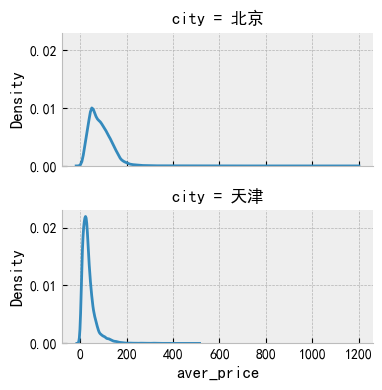

In [112]:
g = sns.FacetGrid(data,row = 'city', height= 2, aspect= 2)
g = g.map(sns.kdeplot, 'aver_price')

In [113]:
dist_price = data.groupby(['city', 'dist'])['aver_price'].mean().reset_index()
dist_price = dist_price.sort_values(by = ['city','aver_price'], ascending = False).reset_index()
dist_price.aver_price = dist_price.aver_price.round(2)
dist_price.drop(columns='index')

,city,dist,aver_price
0,天津,和平,72.41
1,天津,河西,60.84
2,天津,南开,55.30
3,天津,河东,43.82
4,天津,红桥,41.22
5,天津,河北,39.26
6,天津,西青,38.69
7,天津,东丽,29.97
8,天津,北辰,29.79
9,天津,津南,26.92


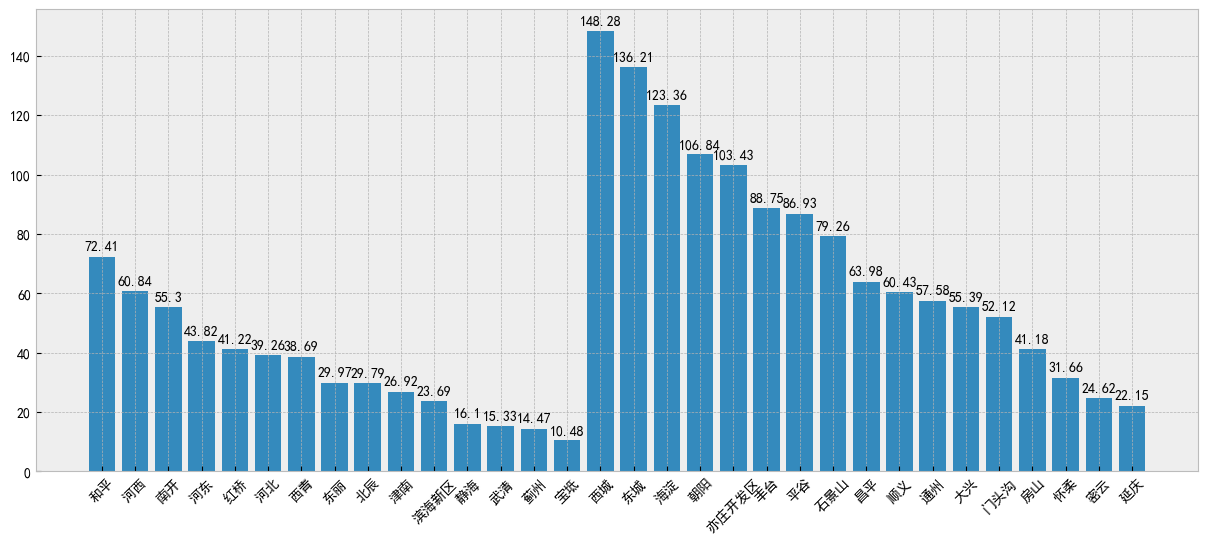

In [114]:
plt.figure(figsize= (15,6))
plt.xticks(rotation = 45)
plt.bar(dist_price.dist, dist_price.aver_price)

for x, y in zip(dist_price.dist, dist_price.aver_price):
    plt.text(x, y+2, y, ha = 'center')

## 房屋大小对每平米租金的影响

In [115]:
def area_price(city, data):
    plt.figure(figsize = (70, 50),dpi=10)
    g = sns.lineplot(  x = 'area',
            y = 'aver_price',
            data = data[(data.city == city)&(data.area < 200)],
                     color = 'r',
                     errorbar= None,
                     linewidth = 14
                )
    g.set_xlabel('总面积',fontweight = 'bold',fontsize = 100) 
    g.set_ylabel('每平米均价', fontweight = 'bold',fontsize = 100)
    g.tick_params(axis='both', labelsize=70)
    plt.grid(True, color='white', linestyle='-', linewidth=15)  # 设置网格线为灰色、虚线、宽度为0.5
    return g

<Axes: xlabel='总面积', ylabel='每平米均价'>

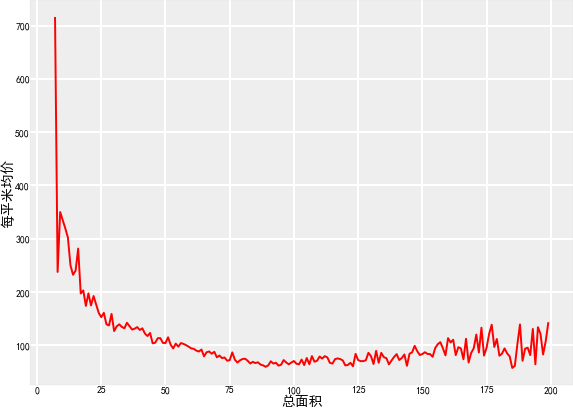

In [116]:
area_price('北京', data)

<Axes: xlabel='总面积', ylabel='每平米均价'>

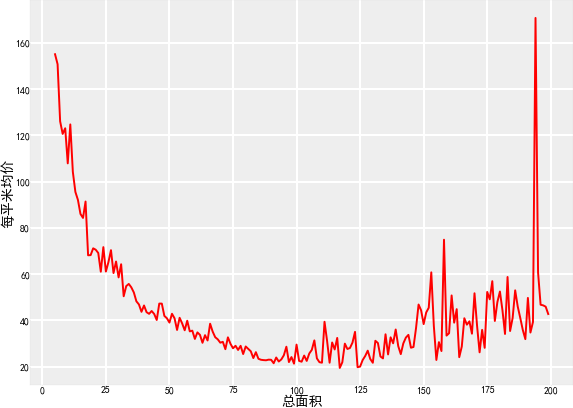

In [117]:
area_price('天津', data)

## 精装和简装对房子价格的影响

In [128]:
import scipy.stats as stats

In [119]:
data['decorated'] = data.rem_word.str.contains('精装')
data[:2]

,title,address,area,city,direction,dist,floor_info,price,rem_word,room_type,floor,bedroom_num,hall_num,bathroom_num,aver_price,decorated
0,整租·广渠家园 2室1厅 西北,东城 广渠门 广渠家园,61,北京,None,东城,高楼层 （29层）,5600,官方核验 精装 集中供暖 随时看房,2室1厅1卫,29,2,1,1.0,91.80,True
1,整租·民旺园 2室1厅 东/西/北,东城 和平里 民旺园,65,北京,None,亦庄开发区,低楼层 （18层）,7500,新上 近地铁 集中供暖 押一付一 随时看房 首次出租,2室1厅1卫,18,2,1,1.0,115.38,False


In [120]:
is_dec = data[data.decorated == 1].groupby('city')['aver_price'].mean()
not_dec = data[data.decorated == 0].groupby('city')['aver_price'].mean()
print(is_dec, not_dec)

city
北京    94.159079
天津    43.969607
Name: aver_price, dtype: float64 city
北京    71.216245
天津    32.412087
Name: aver_price, dtype: float64


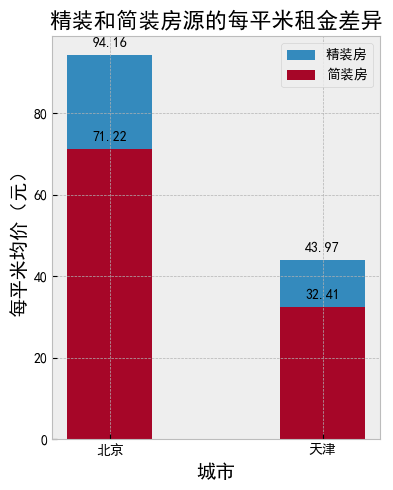

In [121]:
plt.figure(figsize = (4, 5))
plt.bar(is_dec.index, np.round(is_dec.values, 2), width = 0.4, label = '精装房' )
plt.bar(not_dec.index, np.round(not_dec.values, 2), width=0.4, label='简装房')
plt.xlabel('城市', fontsize=14)
plt.ylabel('每平米均价（元）', fontsize=14)
plt.title('精装和简装房源的每平米租金差异', fontsize=16)
plt.legend()
plt.tight_layout() 
for x, y in zip(is_dec.index, is_dec.values):
    plt.text(x, y+2, np.round(y, 2), ha = 'center')

for x, y in zip(not_dec.index, not_dec.values):
    plt.text(x, y+2, np.round(y, 2), ha = 'center')

## 其他条件对价格的影响

In [122]:
data['hating'] = data.rem_word.str.contains('集中供暖')

In [123]:
is_hating = data[data.hating == 1].groupby('city')['aver_price'].mean()
not_hating = data[data.hating == 0].groupby('city')['aver_price'].mean()
print(is_hating, not_hating)

city
北京    87.472152
天津    38.003029
Name: aver_price, dtype: float64 city
北京    86.783039
天津    35.935030
Name: aver_price, dtype: float64


In [124]:
data['metro'] = data.rem_word.str.contains('近地铁')
is_metro = data[data.hating == 1].groupby('city')['aver_price'].mean()
not_metro = data[data.hating == 0].groupby('city')['aver_price'].mean()
print(is_metro, not_metro)

city
北京    87.472152
天津    38.003029
Name: aver_price, dtype: float64 city
北京    86.783039
天津    35.935030
Name: aver_price, dtype: float64


In [125]:
data['looking_time'] = data.rem_word.str.contains('随时看房')
is_looking = data[data.hating == 1].groupby('city')['aver_price'].mean()
not_looking = data[data.hating == 0].groupby('city')['aver_price'].mean()
print(is_looking, not_looking)

city
北京    87.472152
天津    38.003029
Name: aver_price, dtype: float64 city
北京    86.783039
天津    35.935030
Name: aver_price, dtype: float64


In [127]:
high = data[data.floor_info.str.contains('高楼层')].groupby('city')['aver_price'].mean()
middle = data[data.floor_info.str.contains('中楼层')].groupby('city')['aver_price'].mean()
low = data[data.floor_info.str.contains('低楼层')].groupby('city')['aver_price'].mean()
print(high, middle, low)

city
北京    86.727071
天津    39.096539
Name: aver_price, dtype: float64 city
北京    83.093034
天津    36.912527
Name: aver_price, dtype: float64 city
北京    92.993075
天津    36.823294
Name: aver_price, dtype: float64
